In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
print("X_train's shape: ", X_train.shape)
print("y_train's shape: ", y_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (60000, 28, 28)
y_train's shape:  (60000,)
X_test's shape:  (10000, 28, 28)
y_test's shape:  (10000,)


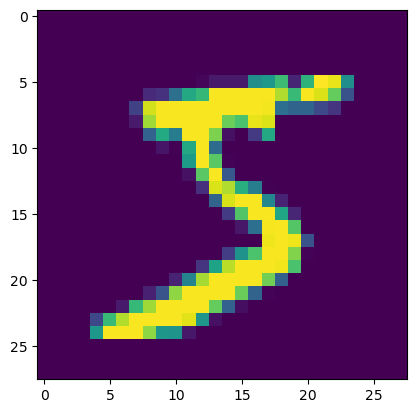

In [10]:
plt.imshow(X_train[0])

In [11]:
y_categorical= to_categorical(y_train)

In [12]:
y_categorical_test = to_categorical(y_test)

In [13]:
y_categorical_train = to_categorical(y_train)

In [15]:
print(X_train[0].max())
print(X_train[0].min())

255
0


In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
print(X_train[0].max())
print(X_train[0].min())

1.0
0.0


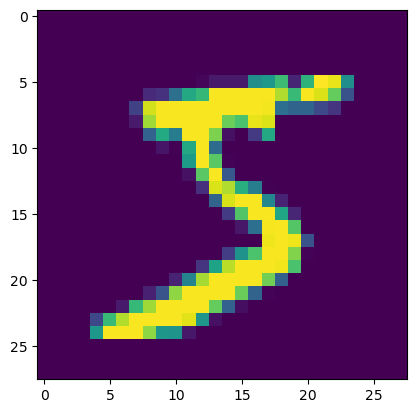

In [19]:
plt.imshow(X_train[0])

In [20]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
model = Sequential([
    Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=(28, 28, 1)  ),
    MaxPool2D(pool_size=2),
    Conv2D(filters=64, kernel_size=5, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_categorical_train.shape[1], activation='softmax')
    
])

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [29]:
model.fit(X_train, y_categorical_train, epochs=10, batch_size=256, validation_data=(X_test, y_categorical_test))

Epoch 1/10
235/235 [==============================] - 54s 223ms/step - loss: 0.3091 - val_loss: 0.0814
Epoch 2/10
235/235 [==============================] - 51s 219ms/step - loss: 0.0727 - val_loss: 0.0558
Epoch 3/10
235/235 [==============================] - 51s 218ms/step - loss: 0.0508 - val_loss: 0.0470
Epoch 4/10
235/235 [==============================] - 51s 215ms/step - loss: 0.0393 - val_loss: 0.0297
Epoch 5/10
235/235 [==============================] - 50s 214ms/step - loss: 0.0301 - val_loss: 0.0308
Epoch 6/10
235/235 [==============================] - 50s 214ms/step - loss: 0.0242 - val_loss: 0.0276
Epoch 7/10
235/235 [==============================] - 50s 213ms/step - loss: 0.0199 - val_loss: 0.0285
Epoch 8/10
235/235 [==============================] - 51s 217ms/step - loss: 0.0176 - val_loss: 0.0346
Epoch 9/10
235/235 [==============================] - 51s 215ms/step - loss: 0.0146 - val_loss: 0.0248
Epoch 10/10
235/235 [==============================] - 51s 218ms/step - l

In [30]:
loss = pd.DataFrame(model.history.history)

In [31]:
loss.head()

,loss,val_loss
0,0.309112,0.081402
1,0.072748,0.055796
2,0.050786,0.047027
3,0.039297,0.029713
4,0.030138,0.030765


<AxesSubplot:>

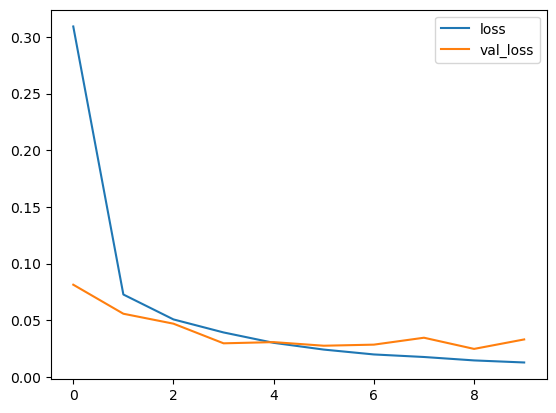

In [32]:
loss.plot()

In [34]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 5s 14ms/step


In [40]:
y_test_classes = np.argmax(y_categorical_test, axis=1)

In [42]:
print(y_pred.shape)
print(y_test_classes.shape)

(10000,)
(10000,)


In [46]:
print(confusion_matrix(y_test_classes, y_pred))
print("\n\n")
print(classification_report(y_test_classes, y_pred, digits=4))

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1131    0    2    0    1    0    1    0    0]
 [   1    1 1023    2    0    0    0    4    1    0]
 [   0    0    0 1007    0    3    0    0    0    0]
 [   0    0    0    0  980    0    1    0    1    0]
 [   1    0    0   10    0  878    1    0    1    1]
 [   8    2    0    1    1    3  941    0    2    0]
 [   1    3    4    1    0    0    0 1018    0    1]
 [   3    2    1    7    1    1    0    1  953    5]
 [   1    0    0    1   12    7    1    3    0  984]]



              precision    recall  f1-score   support

           0     0.9849    0.9980    0.9914       980
           1     0.9930    0.9965    0.9947      1135
           2     0.9951    0.9913    0.9932      1032
           3     0.9767    0.9970    0.9868      1010
           4     0.9859    0.9980    0.9919       982
           5     0.9832    0.9843    0.9838       892
           6     0.9968    0.9823    0.9895       958
           7     0.9903    0.9903

<AxesSubplot:>

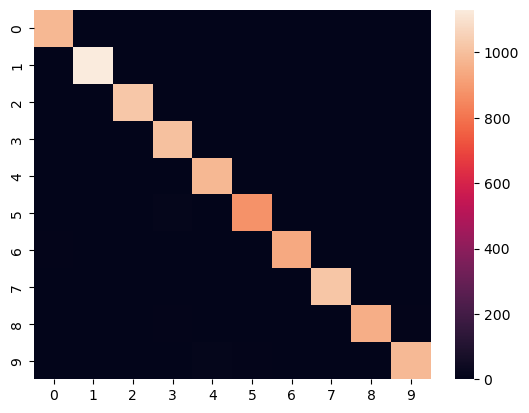

In [51]:
sns.heatmap(confusion_matrix(y_test_classes, y_pred))

In [56]:
example = X_test[20]

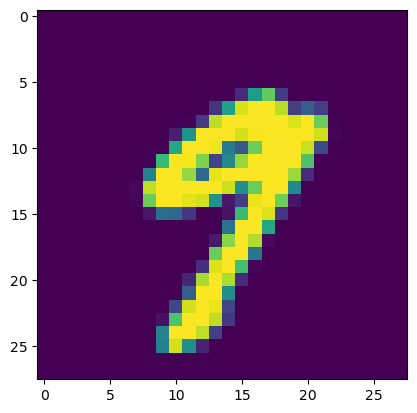

In [57]:
plt.imshow(example)

In [58]:
np.argmax(model.predict(example.reshape(1, 28, 28, 1)), axis=1)

1/1 [==============================] - 0s 40ms/step


array([9], dtype=int64)